# Loading the CIFAR10 dataset

In [1]:
from utils.dataset_loader import cifar10_dataset, cifar10_dataloader
import torchvision, torch
import matplotlib.pyplot as plt
import numpy as np

train_dataset, test_dataset = cifar10_dataset()
train_dataloader, test_dataloader = cifar10_dataloader(train_dataset, test_dataset )

classes = train_dataset.classes
print(classes)  # ['airplane', 'automobile', 'bird', 'cat', ..., 'truck']

Files already downloaded and verified
Files already downloaded and verified
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [2]:
def imgshow(img):
    img = img/2 + 0.5 #undo normalization
    img_np = img.numpy() #for imshow
    
    plt.imshow(np.transpose(img_np, (1, 2, 0)))
    #plt.title(classes[lbl])
    plt.axis('off')
    plt.show()


In [3]:
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

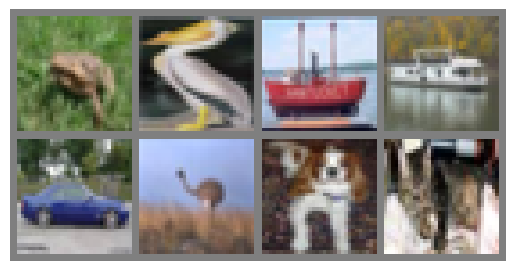

Labels:  ['frog', 'bird', 'ship', 'ship', 'automobile', 'bird', 'dog', 'cat']


In [4]:
imgshow(torchvision.utils.make_grid(images[:8], nrow=4))
print('Labels: ', [classes[i] for i in labels[:8]])

## Training a classical CNN architecture: LeNet-5

In [5]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
from utils.model_architecture import LeNet
from utils.train import train_model

model = LeNet().to(device)
model = train_model(model, train_dataloader, 20)

Epoch [1/20] - Loss: 3050.0415 - Accuracy: 30.21%
Epoch [2/20] - Loss: 2746.2931 - Accuracy: 37.96%
Epoch [3/20] - Loss: 2639.4474 - Accuracy: 40.42%
Epoch [4/20] - Loss: 2547.9695 - Accuracy: 42.52%
Epoch [5/20] - Loss: 2455.2992 - Accuracy: 44.02%
Epoch [6/20] - Loss: 2377.3205 - Accuracy: 45.71%
Epoch [7/20] - Loss: 2314.7283 - Accuracy: 47.07%
Epoch [8/20] - Loss: 2260.4900 - Accuracy: 48.37%
Epoch [9/20] - Loss: 2213.9683 - Accuracy: 49.48%
Epoch [10/20] - Loss: 2170.6411 - Accuracy: 50.24%
Epoch [11/20] - Loss: 2132.8814 - Accuracy: 51.31%
Epoch [12/20] - Loss: 2097.6320 - Accuracy: 52.14%
Epoch [13/20] - Loss: 2067.0068 - Accuracy: 52.93%
Epoch [14/20] - Loss: 2038.5376 - Accuracy: 53.42%
Epoch [15/20] - Loss: 2012.6064 - Accuracy: 54.06%
Epoch [16/20] - Loss: 1986.9158 - Accuracy: 54.55%
Epoch [17/20] - Loss: 1962.0807 - Accuracy: 55.16%
Epoch [18/20] - Loss: 1939.9642 - Accuracy: 55.94%
Epoch [19/20] - Loss: 1921.0539 - Accuracy: 56.29%
Epoch [20/20] - Loss: 1898.6306 - Accura

In [7]:
train_model(model, test_dataloader, train_flag=False)

Test Loss: 400.4546576142311 & Accuracy: 54.30%
